# Titanic Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic Dataset.csv")

In [3]:
# View the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Replace null values
# df.replace(np.nan,'0',inplace = True)
# Fill missing values using mean of the numeric column

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [9]:
#Filter data

df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


# EDA

C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_1716\618612149.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


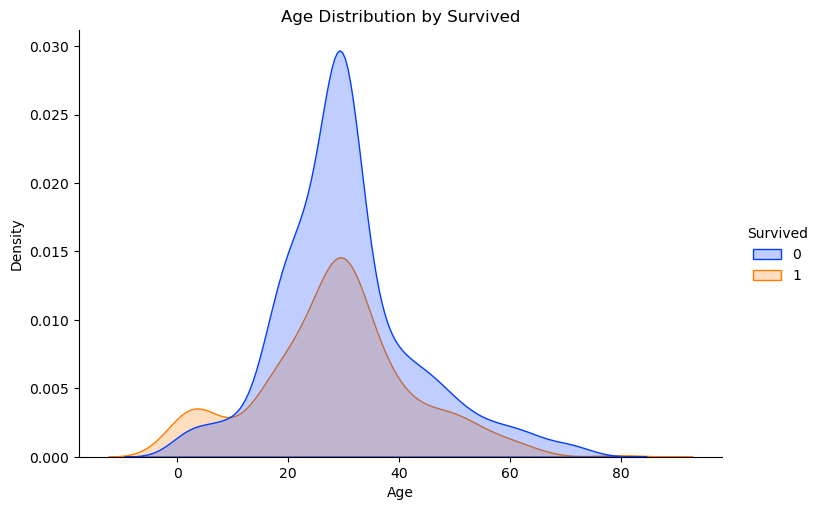

In [10]:
sb.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Survived')
plt.show()

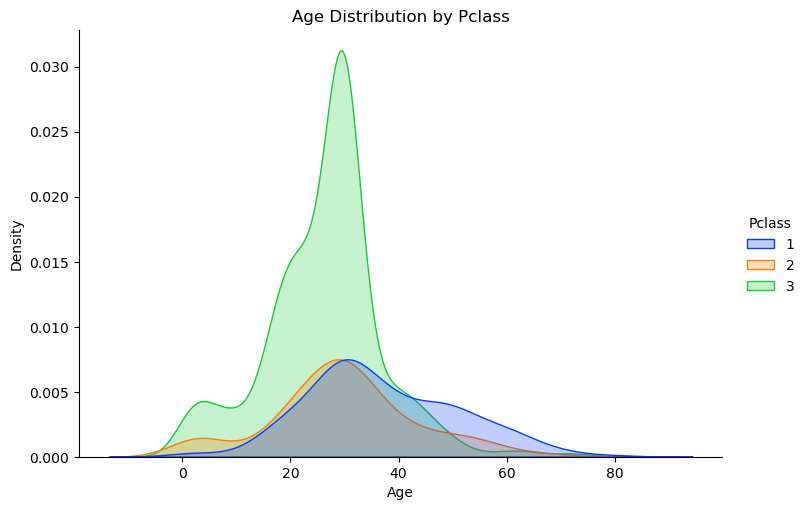

In [11]:
sb.displot(data=df, x='Age', hue='Pclass', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.show()

C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_1716\1726021993.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


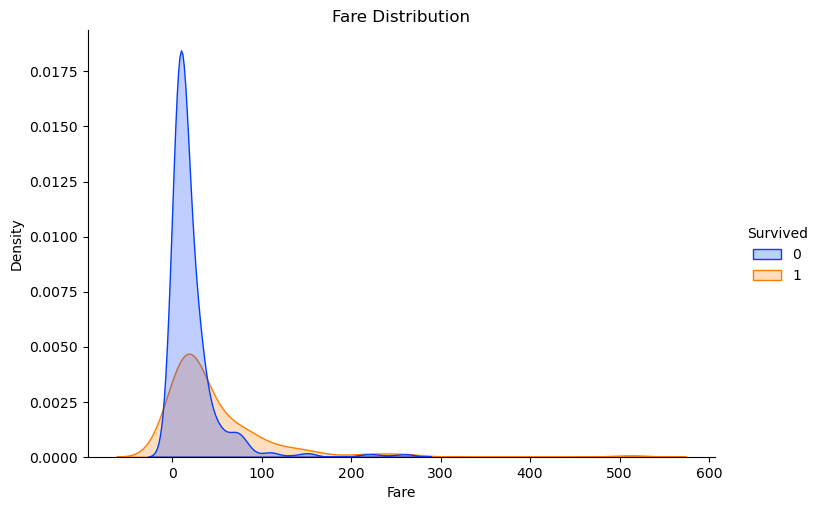

In [12]:
sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Fare Distribution')
plt.show()

C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_1716\2804916360.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright'))


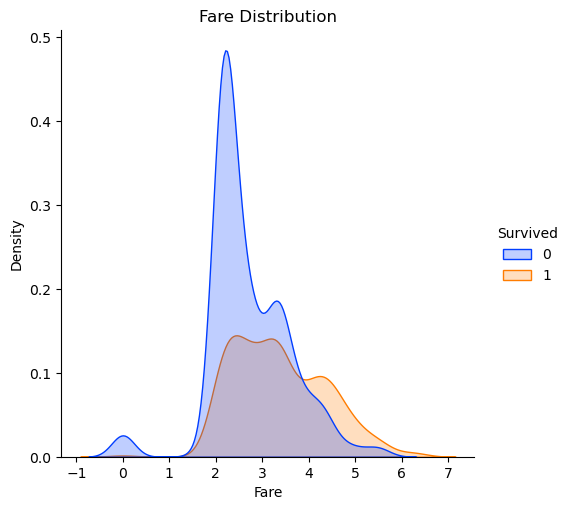

In [13]:
# Fare Transformation (Log)
df['Fare_org']=df['Fare']
df['Fare']=np.log(df['Fare']+1)
sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright'))
plt.title('Fare Distribution')
plt.show()

# Heat Map

<Axes: >

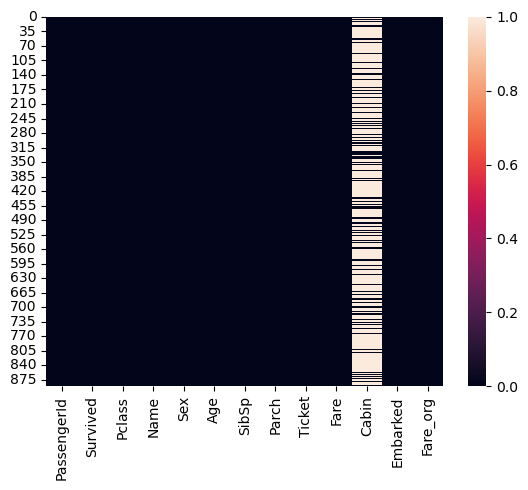

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

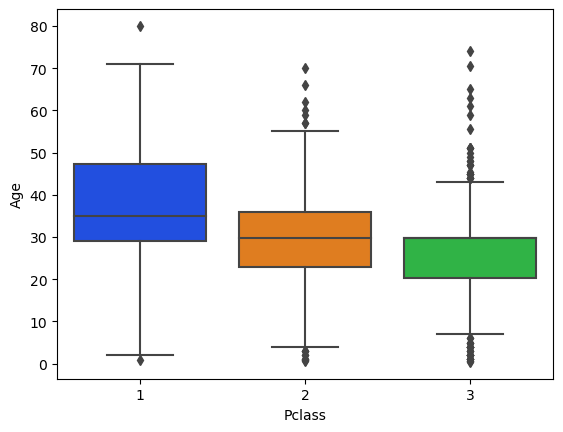

In [15]:
# Pclass can be a proxy for socio-economic status (SES)
sb.boxplot(x="Pclass",y="Age",data=df,palette=sb.color_palette('bright')[:3])

<Axes: xlabel='Pclass', ylabel='Fare_org'>

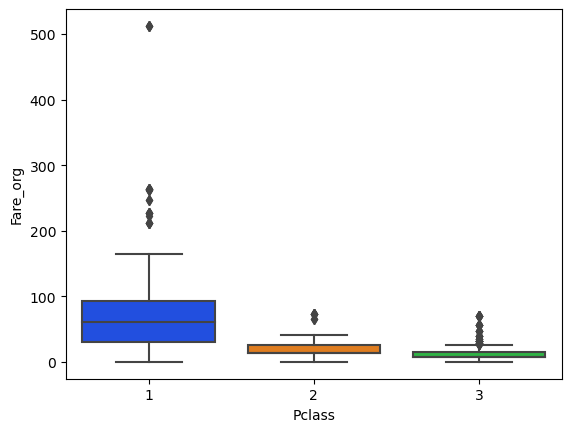

In [16]:
# Pclass can be a proxy for socio-economic status (SES)
sb.boxplot(x="Pclass",y="Fare_org",data=df,palette=sb.color_palette('bright')[:3])

Text(0.5, 1.0, 'PairPlot')

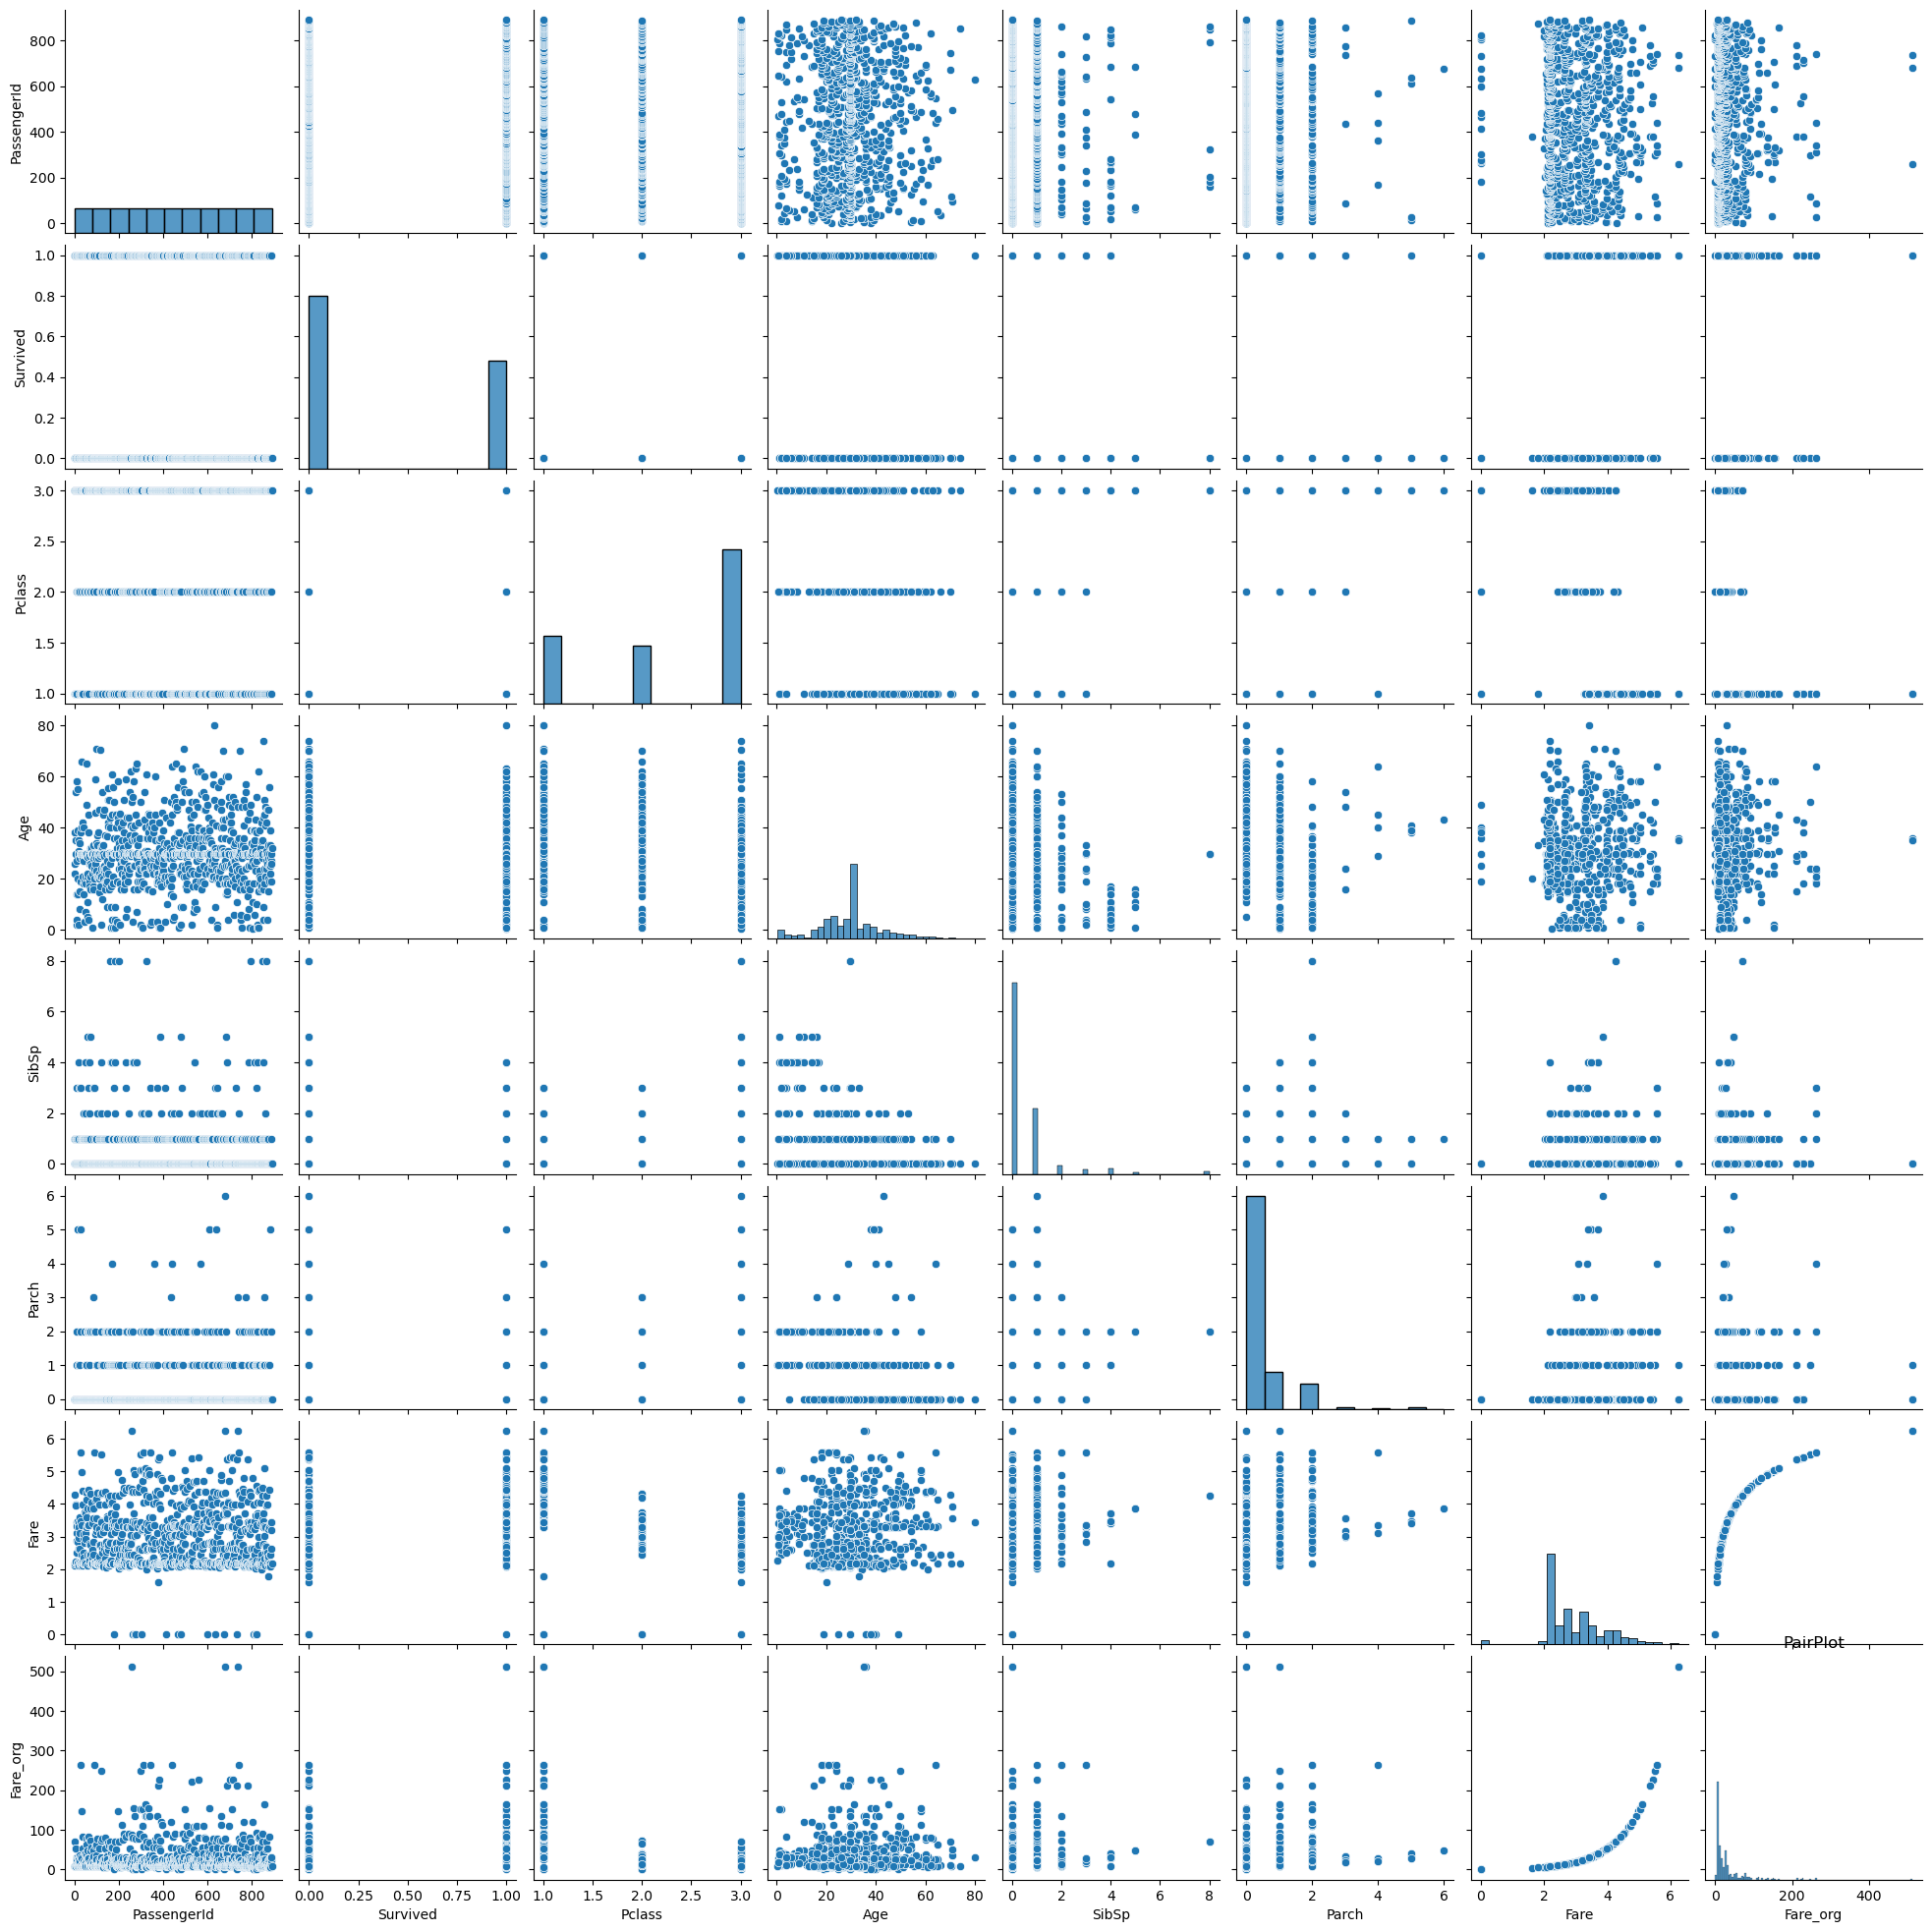

In [18]:
# Viz for each var
sb.pairplot(data=df)
plt.title('PairPlot')

# Correlation

In [19]:
df_corr = df.drop(['PassengerId'], axis = 1)

C:\Users\SARTAJ\AppData\Local\Temp\ipykernel_1716\3736692814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Blues)


Text(0.5, 1.0, 'Correlation Matrix')

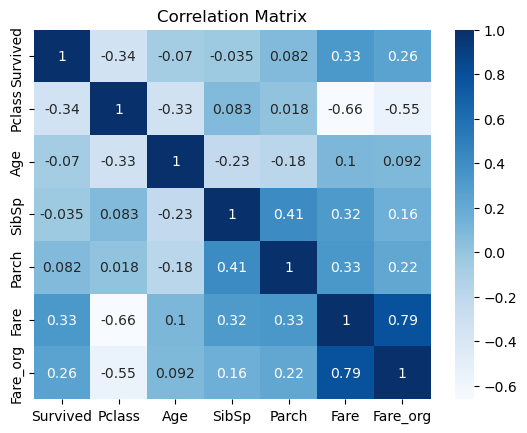

In [20]:
#Corplot
sb.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Blues)
plt.title('Correlation Matrix')

# Classification

In [22]:
#drop unused var
df =df.drop(columns=['Name', 'Ticket', 'Cabin', 'Fare_org'], axis=1)

Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


# Model Training

In [24]:
#Split Data
train_df = df.sample(frac=0.7, random_state=25)
test_df = df.drop(train_df.index)

In [25]:
train_df.head()

# input split
X = train_df.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_df['Survived']

In [27]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
760,3,1,29.699118,0,0,2.740840,2
773,3,1,29.699118,0,0,2.107178,0
266,3,1,16.000000,4,1,3.705921,2
507,1,1,29.699118,0,0,3.316003,2
524,3,1,29.699118,0,0,2.107689,0


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:',np.mean(score))

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8333333333333334
CV Score: 0.7948774193548387


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7628205128205128
CV Score: 0.7483483870967742


In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8141025641025641
CV Score: 0.7965032258064516


In [34]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8012820512820513
CV Score: 0.7981290322580645


# LGBM Classifier

In [37]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X, y)

[LightGBM] [Info] Number of positive: 235, number of negative: 389
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 624, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376603 -> initscore=-0.503994
[LightGBM] [Info] Start training from score -0.503994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [43]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 175, number of negative: 293
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373932 -> initscore=-0.515387
[LightGBM] [Info] Start training from score -0.515387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

# Cat Boost Classifier

In [44]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8525641025641025
CV Score: 0.820516129032258


# Confusion Matrix Display

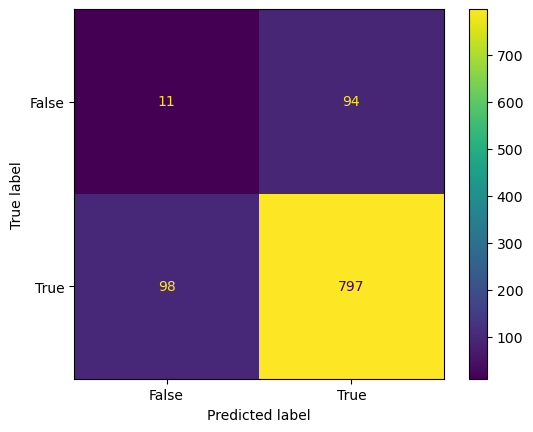

In [46]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Survived People by Class 

In [47]:
survived_class=df.groupby('Pclass')['Survived'].count()
survived_class.to_frame('Survivers')

,Survivers
Pclass,
1,216
2,184
3,491


In [48]:
df['Family_members']=df['Parch']+df['SibSp']
df['Family_members']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family_members, Length: 891, dtype: int64

<Axes: xlabel='Family_members', ylabel='Survived'>

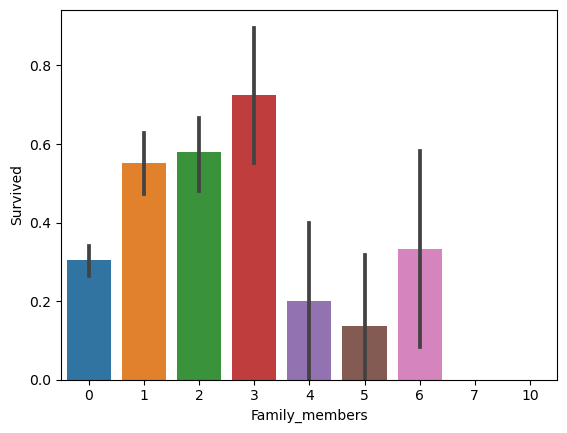

In [49]:
sns.barplot(x =df['Family_members'], y =df['Survived'])

In [50]:
survived_people=df.groupby('Survived').median()
survived_people

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members
Survived,,,,,,,,,
0,455.0,3.0,1.0,29.699118,0.0,0.0,2.442347,2.0,0.0
1,439.5,2.0,0.0,29.699118,0.0,0.0,3.295837,2.0,1.0


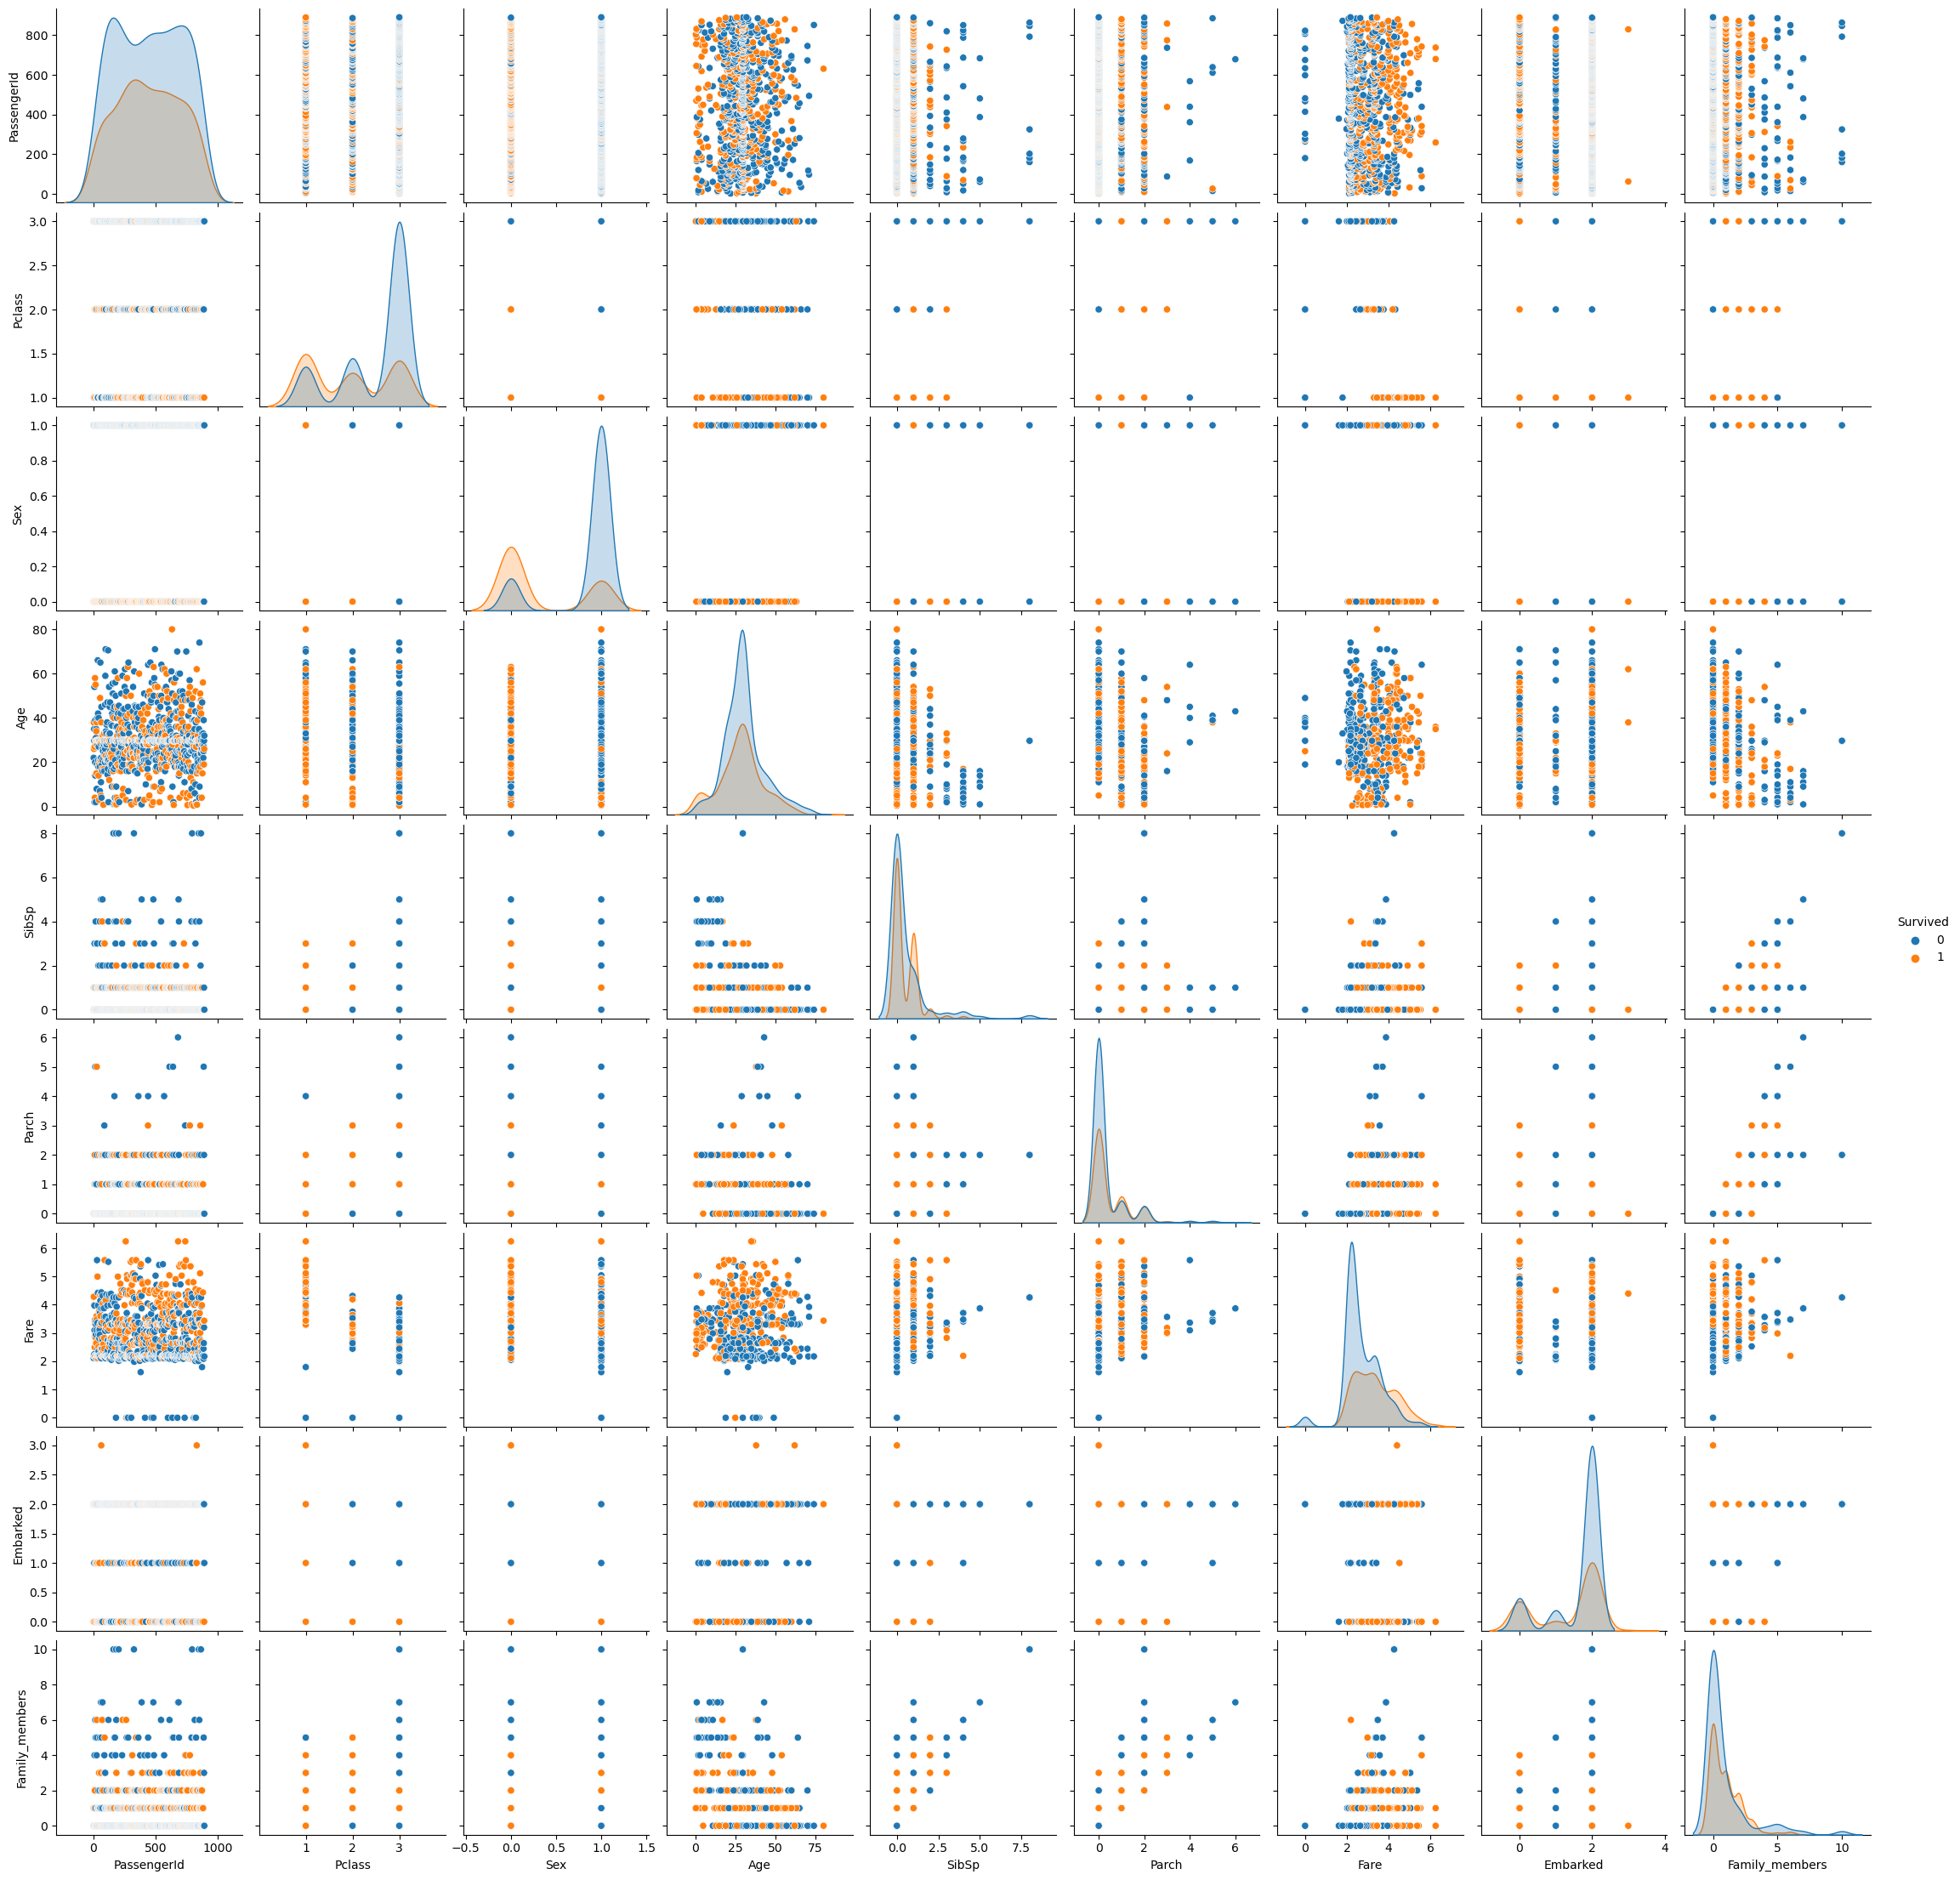

In [51]:
sns.pairplot(df, hue="Survived", height=2.5)
plt.show()

In [52]:
'''Thank you'''

'Thank you'